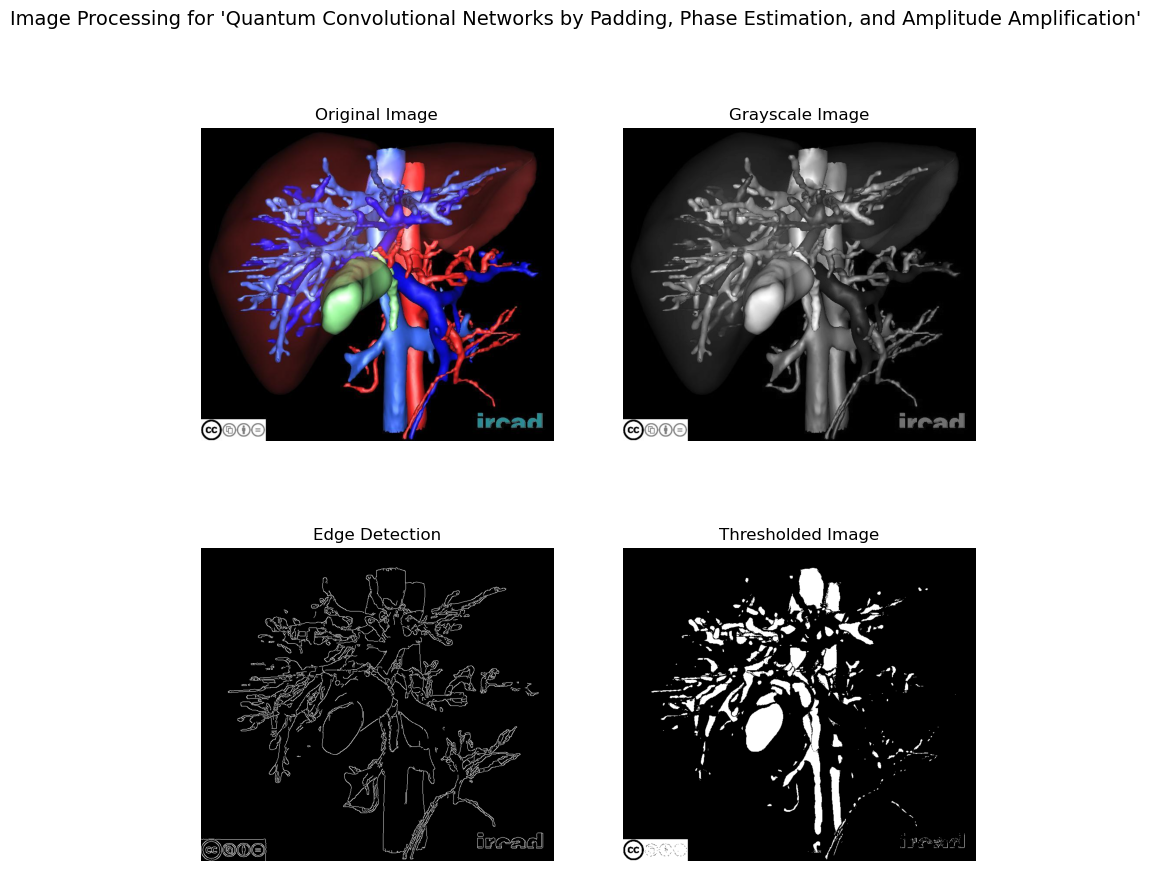

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Load image
image_path = r'C:\Users\ACER\Desktop\3Dircadb1.11\liver_11.jpg'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection (e.g., using Canny)
edges = cv2.Canny(gray_img, 100, 200)

# Apply Gaussian blur for smoothing
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# Apply threshold for segmentation
_, thresholded_img = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY)

# Create subplots to show different stages of processing
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Original Image
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Grayscale Image
axs[0, 1].imshow(gray_img, cmap='gray')
axs[0, 1].set_title('Grayscale Image')
axs[0, 1].axis('off')

# Edge Detection
axs[1, 0].imshow(edges, cmap='gray')
axs[1, 0].set_title('Edge Detection')
axs[1, 0].axis('off')

# Thresholded (Segmentation)
axs[1, 1].imshow(thresholded_img, cmap='gray')
axs[1, 1].set_title('Thresholded Image')
axs[1, 1].axis('off')

# Set the overall title for the figure
fig.suptitle("Image Processing for 'Quantum Convolutional Networks by Padding, Phase Estimation, and Amplitude Amplification'", fontsize=14)



# Show the plot
plt.show()


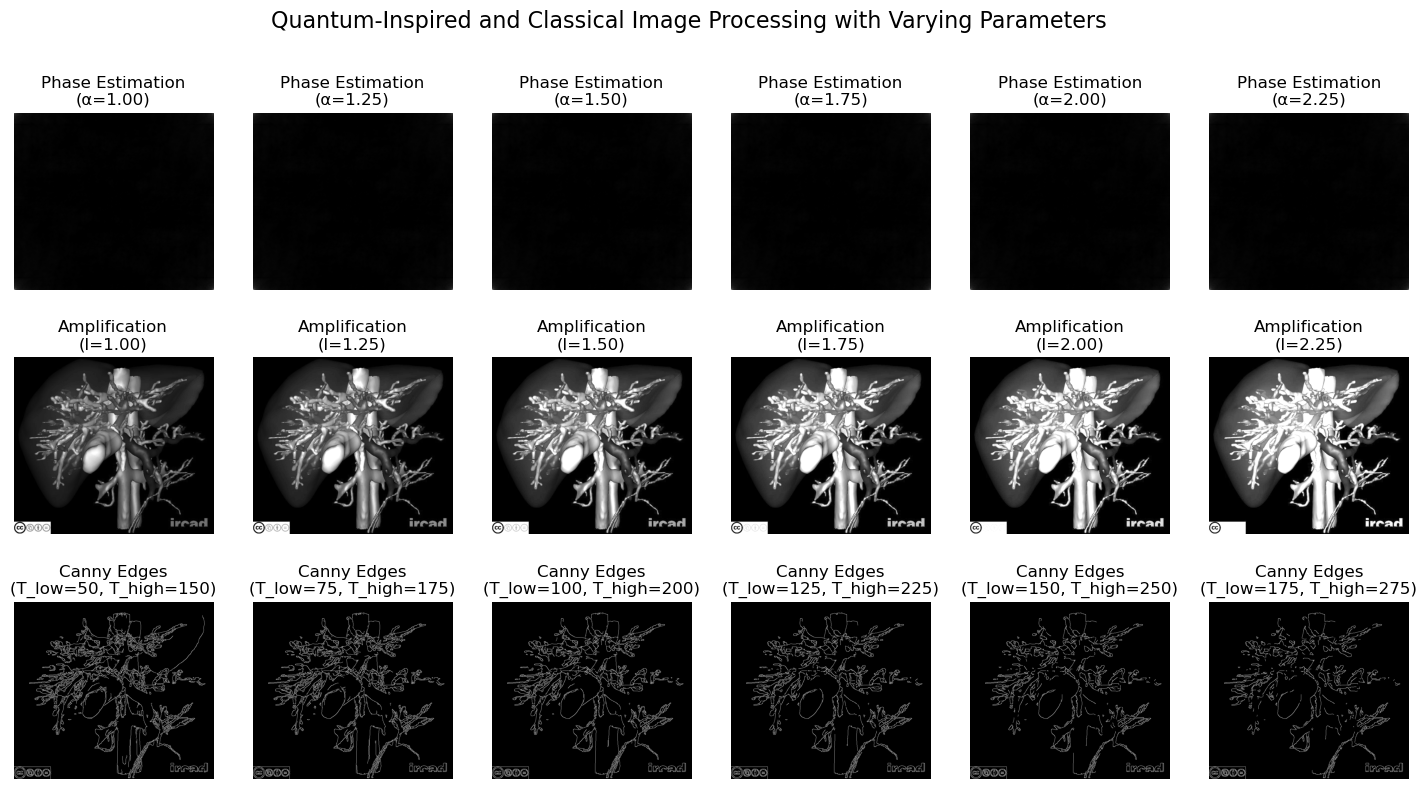

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Quantum-inspired Phase Estimation using Fourier Transform (improved)
def quantum_phase_estimation(img, phase_factor):
    # Apply Fourier Transform to convert image into frequency domain
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    # Compute magnitude and phase from Fourier Transform
    magnitude, phase = cv2.cartToPolar(dft_shift[:, :, 0], dft_shift[:, :, 1])

    # Phase estimation: adjust phase with the given factor
    phase_adjusted = np.angle(phase) * phase_factor

    # Convert phase-adjusted image back to real space
    real_part, imag_part = cv2.polarToCart(magnitude, phase_adjusted)
    back = cv2.merge([real_part, imag_part])
    back_shift = np.fft.ifftshift(back)
    img_back = cv2.idft(back_shift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    # Normalize the output image to make it visually comprehensible
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

    # Amplify the image to make phase changes visible
    img_back = np.clip(img_back * 2, 0, 255).astype(np.uint8)
    
    return img_back

# Quantum-inspired Amplitude Amplification
def quantum_amplitude_amplification(img, intensity_scale):
    # Amplify pixel intensities to simulate amplitude amplification
    amplified_img = np.clip(img * intensity_scale, 0, 255).astype(np.uint8)
    return amplified_img

# Load image
image_path = r'C:\Users\ACER\Desktop\3Dircadb1.11\liver_11.jpg'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Parameter values for exploration
phase_factors = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
intensity_scales = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
canny_thresholds = [(50, 150), (75, 175), (100, 200), (125, 225), (150, 250), (175, 275)]

# Create subplots to show different stages of processing with 6 subplots in each row
fig, axs = plt.subplots(3, 6, figsize=(18, 9))

# Apply various Quantum Phase Estimation (varying phase amplification factor)
for i, phase_factor in enumerate(phase_factors):
    quantum_phase_img = quantum_phase_estimation(gray_img, phase_factor)
    axs[0, i].imshow(quantum_phase_img, cmap='gray')
    axs[0, i].set_title(f'Phase Estimation\n(α={phase_factor:.2f})')
    axs[0, i].axis('off')

# Apply various Quantum Amplitude Amplification (varying intensity scaling)
for i, intensity_scale in enumerate(intensity_scales):
    amplified_img = quantum_amplitude_amplification(gray_img, intensity_scale)
    axs[1, i].imshow(amplified_img, cmap='gray')
    axs[1, i].set_title(f'Amplification\n(I={intensity_scale:.2f})')
    axs[1, i].axis('off')

# Apply classical edge detection (varying thresholds)
for i, (low_thresh, high_thresh) in enumerate(canny_thresholds):
    edges = cv2.Canny(gray_img, low_thresh, high_thresh)
    axs[2, i].imshow(edges, cmap='gray')
    axs[2, i].set_title(f'Canny Edges\n(T_low={low_thresh}, T_high={high_thresh})')
    axs[2, i].axis('off')

# Set the overall title for the figure
fig.suptitle("Quantum-Inspired and Classical Image Processing with Varying Parameters", fontsize=16)



# Show the plot
plt.show()


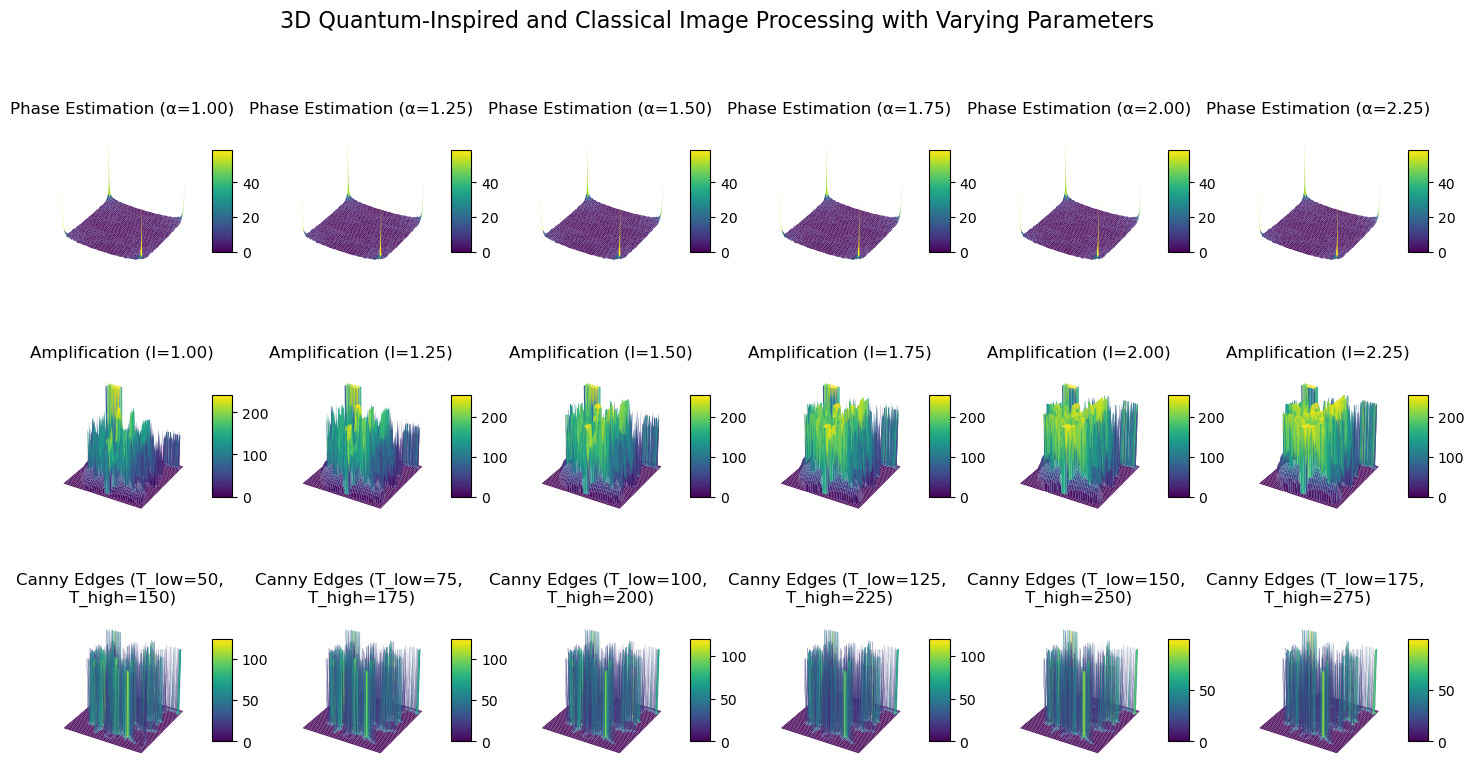

In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
import os

# Quantum-inspired Phase Estimation using Fourier Transform (improved)
def quantum_phase_estimation(img, phase_factor):
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude, phase = cv2.cartToPolar(dft_shift[:, :, 0], dft_shift[:, :, 1])
    phase_adjusted = np.angle(phase) * phase_factor
    real_part, imag_part = cv2.polarToCart(magnitude, phase_adjusted)
    back = cv2.merge([real_part, imag_part])
    back_shift = np.fft.ifftshift(back)
    img_back = cv2.idft(back_shift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    return np.clip(img_back * 2, 0, 255).astype(np.uint8)

# Quantum-inspired Amplitude Amplification
def quantum_amplitude_amplification(img, intensity_scale):
    return np.clip(img * intensity_scale, 0, 255).astype(np.uint8)

# Create 3D surface plot of an image
def plot_3d_surface(ax, img, title, fig):
    x = np.arange(0, img.shape[1], 1)
    y = np.arange(0, img.shape[0], 1)
    x, y = np.meshgrid(x, y)
    
    # Plot surface
    surf = ax.plot_surface(x, y, img, cmap='viridis', edgecolor='none')
    
    # Add axis titles
    ax.set_xlabel('X-axis Pixels')  # Updated label for X-axis
    ax.set_ylabel('Y-axis Pixels')  # Updated label for Y-axis
    ax.set_zlabel('Pixel Intensity')  # Updated label for Z-axis
    
    # Set title and z-axis limits
    ax.set_title(title)
    ax.set_zlim(0, 255)
    
    # Add colorbar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    # Optionally turn off the axis if you don't want gridlines (can comment this out)
    ax.set_axis_off()

# Load image
image_path = r'C:\Users\ACER\Desktop\3Dircadb1.11\liver_11.jpg'
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Parameter values for exploration
phase_factors = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
intensity_scales = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25]
canny_thresholds = [(50, 150), (75, 175), (100, 200), (125, 225), (150, 250), (175, 275)]

# Create a figure with 3D subplots
fig = plt.figure(figsize=(18, 9))

# Plot various Quantum Phase Estimation results (row 1)
for i, phase_factor in enumerate(phase_factors):
    ax = fig.add_subplot(3, 6, i + 1, projection='3d')
    quantum_phase_img = quantum_phase_estimation(gray_img, phase_factor)
    plot_3d_surface(ax, quantum_phase_img, f'Phase Estimation (α={phase_factor:.2f})', fig)
ax.set_zlabel('Pixel Intensity')  # Updated label for Z-axis

# Plot various Quantum Amplitude Amplification results (row 2)
for i, intensity_scale in enumerate(intensity_scales):
    ax = fig.add_subplot(3, 6, i + 7, projection='3d')
    amplified_img = quantum_amplitude_amplification(gray_img, intensity_scale)
    plot_3d_surface(ax, amplified_img, f'Amplification (I={intensity_scale:.2f})', fig)

ax.set_zlabel('Pixel Intensity')  # Updated label for Z-axis

# Plot various Canny Edge Detection results (row 3)
for i, (low_thresh, high_thresh) in enumerate(canny_thresholds):
    ax = fig.add_subplot(3, 6, i + 13, projection='3d')
    edges = cv2.Canny(gray_img, low_thresh, high_thresh)
    plot_3d_surface(ax, edges, f'Canny Edges (T_low={low_thresh}, \nT_high={high_thresh})', fig)

# Set the overall title for the figure
fig.suptitle("3D Quantum-Inspired and Classical Image Processing with Varying Parameters", fontsize=16)



# Show the plot
plt.show()


In [41]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F

# Load and preprocess the image
image_path = r"C:\Users\ACER\Desktop\3Dircadb1.11\liver_11.jpg"
image = Image.open(image_path).convert('L')  # Convert to grayscale
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Define the standard convolutional neural network (CNN)
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(8*8*8, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = x.view(-1, 8*8*8)  # Flatten the tensor
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

# Initialize the network and run the forward pass
net = ConvNet()
output = net(image_tensor)
print(output)


tensor([[-0.1411, -0.1285, -0.0705,  0.0323, -0.0768,  0.0350,  0.0448, -0.0601,
         -0.0480, -0.0961],
        [-0.1387, -0.1184, -0.0699,  0.0301, -0.0854,  0.0348,  0.0521, -0.0618,
         -0.0370, -0.0946],
        [-0.1237, -0.1030, -0.0557,  0.0373, -0.0843,  0.0632,  0.0643, -0.0586,
         -0.0364, -0.1122],
        [-0.1229, -0.1031, -0.0552,  0.0377, -0.0836,  0.0632,  0.0634, -0.0582,
         -0.0369, -0.1129],
        [-0.1232, -0.1022, -0.0537,  0.0370, -0.0838,  0.0647,  0.0610, -0.0573,
         -0.0382, -0.1128],
        [-0.1232, -0.1022, -0.0537,  0.0370, -0.0838,  0.0647,  0.0610, -0.0573,
         -0.0382, -0.1128],
        [-0.1232, -0.1022, -0.0537,  0.0370, -0.0838,  0.0647,  0.0610, -0.0573,
         -0.0382, -0.1128],
        [-0.1232, -0.1022, -0.0537,  0.0370, -0.0838,  0.0647,  0.0610, -0.0573,
         -0.0382, -0.1128],
        [-0.1232, -0.1022, -0.0537,  0.0370, -0.0838,  0.0647,  0.0610, -0.0573,
         -0.0382, -0.1128],
        [-0.1232, -